Theodore 

The purpose of this notebook is to analyze the data stored in the .npz file.

### Load the data 

In [1]:
## ------------------------ IMPORT LIB ------------------------ ##

import numpy as np
import matplotlib.pyplot as plt
from DataSet import DataSet
from PostProcessor import PostProcessor

In [2]:
## ------------------------ DEFINE COUNSTANTS AND VARIABLES ------------------------ ##

AF = 'EI'

In [3]:
pp1 = PostProcessor('results/gpbo_{0}_{1}.npz'.format(AF, 'first_GPBO_validResponses'))
pp1.load_data()
pp2 = PostProcessor('results/gpbo_{0}_{1}.npz'.format(AF, 'first_GPBO_meanResponses'))
pp2.load_data()
pp3 = PostProcessor('results/gpbo_{0}_{1}.npz'.format(AF, 'first_GPBO_realisticResponses'))
pp3.load_data()
pp4 = PostProcessor('results/gpbo_{0}_{1}.npz'.format(AF, 'first_GPBO_meanResponses30rep'))
pp4.load_data()
pp5 = PostProcessor('results/gpbo_{0}_{1}.npz'.format(AF, 'first_GPBO_validResponses30rep'))
pp5.load_data()
pp6 = PostProcessor('results/gpbo_{0}_{1}.npz'.format('NEI', 'first_GPBO_validResponses30rep'))
pp6.load_data()
pp7 = PostProcessor('results/gpbo_{0}_{1}.npz'.format('NEI', 'first_GPBO_meanResponses30rep'))
pp7.load_data()
pp8 = PostProcessor('results/gpbo_{0}_{1}.npz'.format('NEI', 'first_GPBO_validResponses'))
pp8.load_data(load_durations = True)
print(pp8.data.files)

['P_test_x', 'P_test_x_idx', 'P_test_y', 'P_mean_pred', 'P_std_pred', 'best_pred_x', 'best_pred_x_measured', 'rand_idx', 'elapsed_time', 'iter_durations', 'hyp_opti_durations', 'mean_calc_durations', 'std_calc_durations', 'emgs', 'nChan', 'sorted_isvalid', 'sorted_resp', 'sorted_respMean', 'ch2xy']


### exploration and exploitation performances

In [4]:
print(pp1.best_pred_x.shape)

(6, 1, 1, 96)


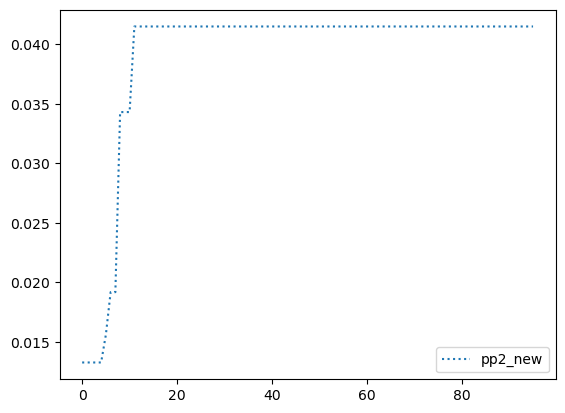

0.041497223
23
[ 0 40 40 40 40 20 11 22 42 32 32 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23]
[40 40 40 40 40 30 21 21 32 32 32 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23]
[40 87 18 69 37 30 21  2 32 52 33 23 13 24 22 23 23 23 23  0 92 38 65 89
 23  7 72 57 23 94 45 54 23 43 23 78 58 60 17 23 23 10 23 23 23 23 74 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23]


In [5]:
# best_x_1 = pp1.best_pred_x[0, 0, 0, :]
best_x_2 = pp2.best_pred_x[0, 0, 0, :]
# best_x_new_1 = pp1.best_pred_x_measured[0, 0, 0, :]
best_x_measured_2 = pp2.best_pred_x_measured[0, 0, 0, :]

# plt.plot(pp1.ds_set['sorted_respMean'][best_x_1, 0], label='pp1', linewidth=4)
# plt.plot(pp2.ds_set['sorted_respMean'][best_x_2, 0], label='pp2', linestyle='--')
# plt.plot(pp1.ds_set['sorted_respMean'][best_x_measured_1, 0], label='pp1_new')
plt.plot(pp2.ds_set['sorted_respMean'][best_x_measured_2, 0], label='pp2_new', linestyle=':')
plt.legend()
plt.show()

print(np.max(pp1.ds_set['sorted_respMean'][:, 0]))
print(np.argmax(pp1.ds_set['sorted_respMean'][:, 0]))

print(best_x_2)
print(best_x_measured_2)
print(pp2.P_test_x_idx[0, 0, 0, :])


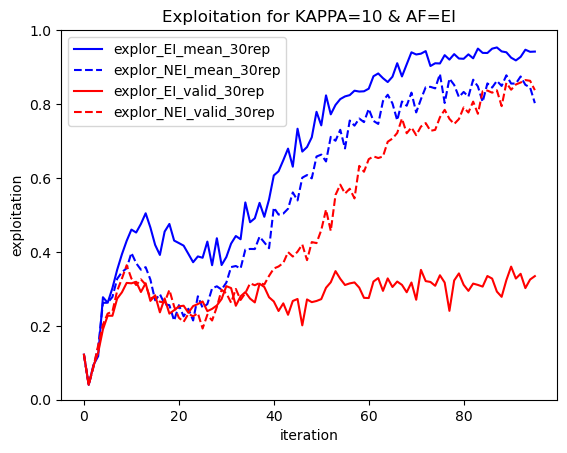

In [6]:
# plt.plot(pp2.exploitation(), label='exploit_mean')
# plt.plot(pp1.exploitation(), label='exploit_valid')
# plt.plot(pp3.exploitation(), label='exploit_realistic', linestyle=':')
plt.plot(pp4.exploitation(), label='explor_EI_mean_30rep', color='b')
plt.plot(pp7.exploitation(), label='explor_NEI_mean_30rep', linestyle='--', color='b')
plt.plot(pp5.exploitation(), label='explor_EI_valid_30rep', color='r')
plt.plot(pp6.exploitation(), label='explor_NEI_valid_30rep', linestyle='--', color='r')
plt.legend()
plt.title("Exploitation for KAPPA=10 & AF=EI")
plt.xlabel("iteration")
plt.ylabel("exploitation")
plt.ylim(0, 1)
plt.show()

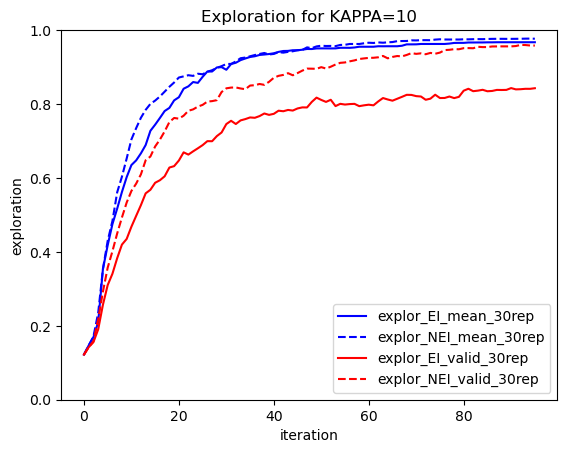

In [7]:
# plt.plot(pp2.exploration(), label='explor_mean')
# plt.plot(pp1.exploration(), label='explor_valid')
# plt.plot(pp3.exploration(), label='explor_realistic', linestyle=':')
plt.plot(pp4.exploration(), label='explor_EI_mean_30rep', color='b')
plt.plot(pp7.exploration(), label='explor_NEI_mean_30rep', linestyle='--', color='b')
plt.plot(pp5.exploration(), label='explor_EI_valid_30rep', color='r')
plt.plot(pp6.exploration(), label='explor_NEI_valid_30rep', linestyle='--', color='r')
plt.legend()
plt.title("Exploration for KAPPA=10")
plt.xlabel("iteration")
plt.ylabel("exploration")
plt.ylim(0, 1)
plt.show()

In [8]:
perf_iter, perf_hyp, perf_mean, perf_std = pp8.duration_metrics()

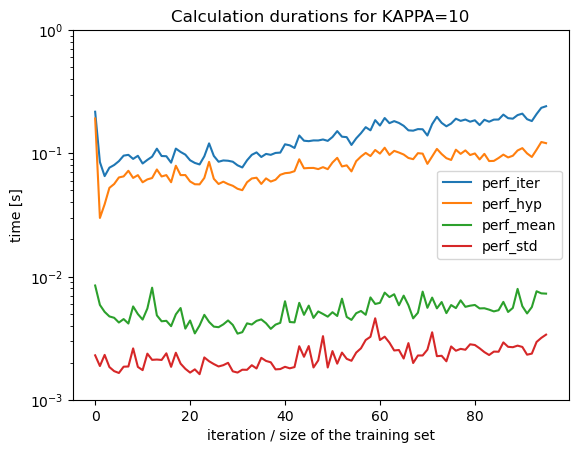

In [14]:
plt.plot(perf_iter, label='perf_iter')
plt.plot(perf_hyp, label='perf_hyp')
plt.plot(perf_mean, label='perf_mean')
plt.plot(perf_std, label='perf_std')
plt.legend()
plt.title("Calculation durations for KAPPA=10")
plt.xlabel("iteration / size of the training set")
plt.ylabel("time [s]")
plt.yscale('log')
# plt.xscale('log')
plt.ylim(1.e-3, 1)
plt.show()

In [10]:
perf_std

array([0.00229253, 0.00187723, 0.00231182, 0.00184138, 0.00170662,
       0.00164835, 0.00185425, 0.00186075, 0.0026098 , 0.00184562,
       0.00173852, 0.00236642, 0.0021071 , 0.00211917, 0.00210307,
       0.00238028, 0.00184925, 0.00240658, 0.00196268, 0.00178182,
       0.00166032, 0.00176387, 0.00161138, 0.00220413, 0.00205255,
       0.00194738, 0.00186183, 0.00190755, 0.00199327, 0.00169972,
       0.00166137, 0.00175235, 0.00174915, 0.00190587, 0.00179302,
       0.00218817, 0.00206478, 0.00201238, 0.00176337, 0.00177357,
       0.00185013, 0.00179843, 0.00184038, 0.0027181 , 0.0022312 ,
       0.0027258 , 0.00182693, 0.00208637, 0.00328318, 0.00182567,
       0.002482  , 0.00196213, 0.00241308, 0.00214692, 0.00207035,
       0.00241375, 0.00261375, 0.00305412, 0.00324225, 0.00458188,
       0.0030524 , 0.00324912, 0.00290572, 0.0025107 , 0.00253208,
       0.00215907, 0.0028808 , 0.0019857 , 0.00228527, 0.0022861 ,
       0.00254897, 0.00352607, 0.00225695, 0.0022731 , 0.00205

In [11]:
import time 
a=0
test = np.zeros((96))
for i in range(96):
    tic = time.perf_counter()
    a += pp8.ds_set['sorted_resp'][0,0][0,0]
    tac = time.perf_counter()
    test[i]= tac - tic
print(test)



[3.12999764e-05 1.50001142e-06 4.00003046e-07 3.00002284e-07
 4.00003046e-07 3.00002284e-07 3.00002284e-07 6.00001658e-06
 4.00003046e-07 2.99973181e-07 3.00002284e-07 4.00003046e-07
 3.00002284e-07 3.00002284e-07 3.00002284e-07 3.00002284e-07
 2.00001523e-07 2.99973181e-07 3.00002284e-07 3.00002284e-07
 3.00002284e-07 3.00002284e-07 3.00002284e-07 3.00002284e-07
 3.00002284e-07 1.99972419e-07 3.00002284e-07 2.00001523e-07
 3.00002284e-07 2.00001523e-07 3.00002284e-07 2.00001523e-07
 3.00002284e-07 3.00002284e-07 3.00002284e-07 3.00002284e-07
 3.00002284e-07 3.00002284e-07 3.00002284e-07 3.00002284e-07
 3.00002284e-07 3.00002284e-07 2.99973181e-07 3.00002284e-07
 3.00002284e-07 3.00002284e-07 3.00002284e-07 2.00001523e-07
 3.00002284e-07 2.00001523e-07 3.00002284e-07 3.00002284e-07
 3.00002284e-07 3.00002284e-07 3.00002284e-07 3.00002284e-07
 3.00002284e-07 3.00002284e-07 3.00002284e-07 2.99973181e-07
 3.00002284e-07 3.00002284e-07 3.00002284e-07 3.00002284e-07
 3.00002284e-07 3.000022